In [1]:
%load_ext autoreload
%autoreload 2
import sys, networkx as nx, matplotlib.pyplot as plt
sys.path.insert(0, '../')
from Models.potts import Potts
from Models.fastIsing import Ising
import numpy as np

n = 100
g = nx.grid_2d_graph(n, n)
model = Potts(graph = g, agentStates = [0, 1, 2, 3], memorySize = 0, delta = 1)
# print(model.memory.base)
model.reset()
model.updateType = 'async'

temps = np.linspace(0, np.log10(g.number_of_nodes()), 20)
N     = 100
mag, sus = model.matchMagnetization(temps, N)
t = np.argmin(abs(mag - .75))
fig, ax = plt.subplots()
ax.plot(temps, mag)
ax.scatter(temps[t], mag[t])
fig.show()

model.t = temps[t]
res = model.simulate(int(1e4))

# print(model.memory.base)

  0%|          | 0/20 [00:00<?, ?it/s]

Computing mag per t


100%|██████████| 20/20 [00:29<00:00,  4.73s/it]/home/casper/miniconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


<IPython.core.display.Javascript object>


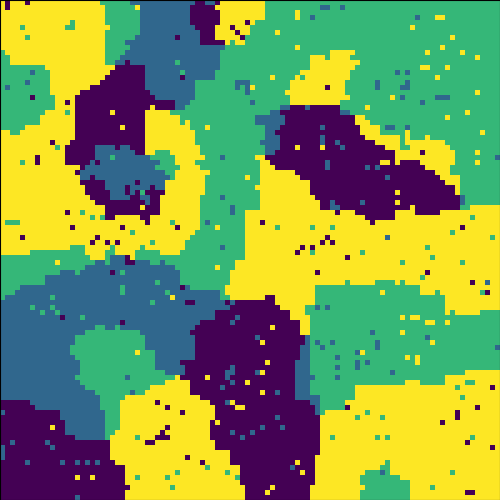

interactive(children=(IntSlider(value=0, description='time_step', max=9999), Output()), _dom_classes=('widget-…

In [14]:
%matplotlib notebook
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
fig, ax = plt.subplots(figsize = (5,5))
ax.set_xlabel('Node', fontsize = 20)
ax.set_ylabel('Node', fontsize = 20)
ax.set(xticks = [], yticks = [])
h = ax.imshow(res[0].reshape(n,n), aspect = 'equal')

fig.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
        hspace = 0, wspace = 0)
@interact(time_step = widgets.IntSlider(min = 0, max = res.shape[0] - 1, value = 0))
def update(time_step = 0):
    try:
        h.set_data(res[time_step].reshape(n,n))
#     ax.set_title(f'Time = {time_step}')
        fig.canvas.flush_events()
        fig.canvas.draw()
    except Exception as e: print(e)

<IPython.core.display.Javascript object>


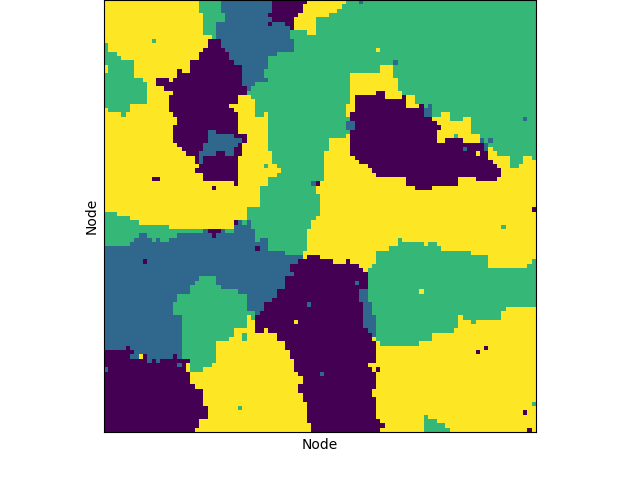

In [39]:
# fig, ax = plt.subplots(figsize = (5,5))
# ax.set_xlabel('Node', fontsize = 20)
# ax.set_ylabel('Node', fontsize = 20)
# ax.set(xticks = [], yticks = [])
# h = ax.imshow(res[0].reshape(n,n), aspect = 'equal')
# fig.show()
# while True:
#     for d in res:
#         h.set_data(d.reshape(n, n))
#         fig.canvas.flush_events()
#         fig.canvas.draw()

fig, ax = plt.subplots()
h = ax.imshow(res[0].reshape(n, n), aspect = 'equal')

ax.set(xticks = [], yticks = [], xlabel = 'Node', ylabel = 'Node')
fig.subplots_adjust(top = 1, bottom = 0.1, right = 1, left = 0,
         hspace = 0, wspace = 0)
def update(frame):
    h.set_data(res[frame].reshape(n,n))
    return h
from matplotlib.animation import writers, FuncAnimation as fa

Writer = writers['ffmpeg']
writer = Writer(fps = 15, bitrate = 1800)

ani = fa(fig, update, frames = range(0, 1000, 10),  blit = 1)
ani.save('test.mp4', writer = writer)